<a href="https://colab.research.google.com/github/AmeiyAcharya/ImgClassf01/blob/main/ImageClass06_07_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Load Data and Setup



**Setup**

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib
# tensorflow is for data pipeline
# opencv is for removing corrupt images
# matplotlib is to visualize the data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 68.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-

In [2]:
!pip list
# shows list of the packages installed

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [3]:
import tensorflow as tf
import os
# os is used for file structure management

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')
# note that the notebook has been configured to have a gpu in the hardware accelerator section
# hence gpu count is 1

In [5]:
len(gpus)
len(cpus)

1

In [6]:
# in case of an offline installation : which i haven't been able to perfect yet
# we need to avoid OOM errors where the gpu eats up everything able in RAM
# here the set_memory_growth function does the above
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


**Image Weeding**

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt
# cv2 is opencv
# imghdr is used to check the correctness of the extensions
# by corrupt imgs we mean incorrect or unhandle-able extension

In [24]:
# as in my case, the local setup isn't complete
# will be proceeding with importing the data uploaded to the repo
! git clone https://github.com/AmeiyAcharya/ImgClassf01

fatal: destination path 'ImgClassf01' already exists and is not an empty directory.


In [23]:
data_dir = '/content/ImgClassf01'

In [10]:
# this method will return all the directories present in the folder
os.listdir(data_dir)
# tried to manually remove - didnt work
# ! rm .git
# ! rm README.md

['Happy', 'About.mkd', '.git', 'Sad', 'MethodsLearnt.mkd', 'README.md']

In [39]:
# file_path1 = ('/content/ImgClassf01/README.md')
# os.remove(file_path1)
# file_path2 = ('/content/ImgClassf01/MethodsLearnt.mkd')
# os.remove(file_path2)
# file_path3 = ('/content/ImgClassf01/About.mkd')
# os.remove(file_path3)
# file_path4 = ('/content/ImgClassf01/.git')
# os.rmdir(file_path4)
!rm -rf .git

In [32]:
# this allows us to parse through all the images in the happy data
os.listdir(os.path.join(data_dir,'Happy'))

['GettyImages-871518740-1024x707.jpg',
 'file-20230208-27-3jttof.jpg',
 'image11.jpeg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'image3.jpeg',
 'image2.jpeg',
 'Happy_People.png',
 'image.jpeg',
 'image12.jpeg',
 'image16.jpeg',
 'habits-of-happy-people.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'image22.jpeg',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 'image21.jpeg',
 'images.jpg',
 '05-12-21-happy-people.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'image5.jpeg',
 'image29.jpeg',
 'getty_478389113_970647970450091_99776.jpg',
 'image17.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 '988689_Wallpaper2.jpg',
 'Happy-people-800x533.jpg',
 'image25.jpeg',
 'happy-woman-headphones-pink-african-american-1296x728-header.jpg',
 'hdptcar-fi-2.jpg',
 'getty_107808334_121413.jpg',
 'image6.j

In [33]:
# defining the acceptable image types
img_exts=['jpg','png','bmp','jpeg']

The below code cell basically eliminates the unsuitable images from the happy and sad datasets ; unfortunately haven't been able to figure out a workaround for doing it in a nested loop - instead using two for loops with the directory specified

In [34]:
# traversing the img data

#for image_class in os.listdir(data_dir):
  # print(image_class) this loop traverses the data directory having all happy, sad etc folders listed in the github repo
  # we wont be using it because i found no solution to cleanly exclude .git and RM files so will tell it to manually look through Happy and Sad only
  # the below loop would have been nested inside the above if i were using that method effectively
for image in os.listdir(os.path.join(data_dir,'Happy')):
  image_path = os.path.join(data_dir, 'Happy', image)
  try:
    img = cv2.imread(image_path)
    tip = imghdr.what(image_path)
    if tip not in img_exts:
      print('Image not in ext list {}'.format(image_path))
      os.remove(image_path)
    # so basically what is happening within try is
    # we defined a variable img and checked if opencv can read it
    # then we defined a variable tip that checks the file specified and returns it's type
    # then if the tip varible is not a type belonging to the types in img exts array that we previously defined
    # we remove that file
  except Exception as e:
    print('Issue with image {}'.format(image_path))

for image in os.listdir(os.path.join(data_dir,'Sad')):
  image_path = os.path.join(data_dir, 'Sad', image)
  try:
    img = cv2.imread(image_path)
    tip = imghdr.what(image_path)
    if tip not in img_exts:
      print('Image not in ext list {}'.format(image_path))
      os.remove(image_path)
  except Exception as e:
    print('Issue with image {}'.format(image_path))


In [35]:
# checking the no. of imgs left in the dataset we previously had 95 imgs in happy set and 100 in sad set
print(len(os.listdir(os.path.join(data_dir, 'Happy'))))
print(len(os.listdir(os.path.join(data_dir,'Sad'))))


80
78


This is to see an image we are working with.
we basically can see that the image we are working with has now converted to a numpy array with 183 rows , 275 columns and 3 channels- rgb.

In [15]:
img2 = cv2.imread(os.path.join(data_dir, 'Happy', '154006829.jpg'))
img.shape

(183, 275, 3)

here we need to note that opevCV sees colors in bgr while matplotlib sees in rgb therefore we need to apply the method of converting bgr2rgb

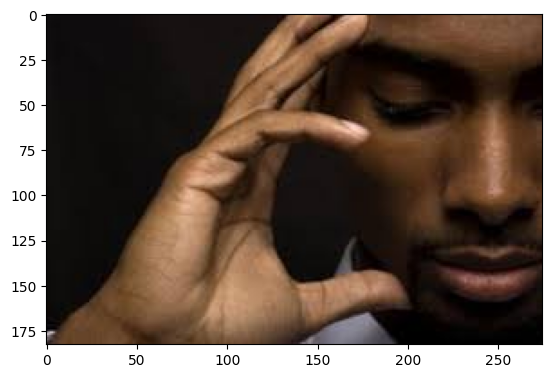

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

**Loading Data via API**

preferred because we can convert this into pipelines that can be scaled up for much larger applications

In [17]:
tf.data.Dataset??

In [18]:
import numpy as np
from matplotlib import pyplot as plt

basically this batches your images , resizes images and also creates classes based on what it infers from the dataset. SO it basically helps streamline img classification work

In [19]:
tf.keras.utils.image_dataset_from_directory??

In [67]:
data = tf.keras.utils.image_dataset_from_directory('ImgClassf01')

Found 158 files belonging to 3 classes.


In [21]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
data_iterator = data.as_numpy_iterator()

the use case for the iterator here is that if allows us to traverse through the selection / batches --- the actual explanation is in the MethodsLearnt
Section

In [37]:
data_iterator

we use batch here to select individual batches from the iterator

In [55]:
batch = data_iterator.next()
batch

(array([[[[1.94738281e+02, 2.05738281e+02, 2.07738281e+02],
          [1.98738281e+02, 2.09738281e+02, 2.11738281e+02],
          [2.02857422e+02, 2.13857422e+02, 2.15857422e+02],
          ...,
          [1.02559570e+02, 2.45595703e+01, 2.25595703e+01],
          [9.30000000e+01, 2.05000000e+01, 1.70000000e+01],
          [8.95000000e+01, 2.15000000e+01, 1.60000000e+01]],
 
         [[1.91178711e+02, 2.02178711e+02, 2.06178711e+02],
          [1.94857422e+02, 2.05857422e+02, 2.09857422e+02],
          [1.96857422e+02, 2.07857422e+02, 2.11857422e+02],
          ...,
          [1.01500000e+02, 2.25000000e+01, 2.10000000e+01],
          [9.33574219e+01, 1.93574219e+01, 1.63574219e+01],
          [8.98212891e+01, 1.95361328e+01, 1.51787109e+01]],
 
         [[1.86893555e+02, 1.97893555e+02, 2.01893555e+02],
          [1.90691406e+02, 2.01691406e+02, 2.05691406e+02],
          [1.93893555e+02, 2.04893555e+02, 2.08893555e+02],
          ...,
          [9.97978516e+01, 2.07978516e+01, 1.9297

In [56]:
len(batch)

2

In [57]:
batch[0]

array([[[[1.94738281e+02, 2.05738281e+02, 2.07738281e+02],
         [1.98738281e+02, 2.09738281e+02, 2.11738281e+02],
         [2.02857422e+02, 2.13857422e+02, 2.15857422e+02],
         ...,
         [1.02559570e+02, 2.45595703e+01, 2.25595703e+01],
         [9.30000000e+01, 2.05000000e+01, 1.70000000e+01],
         [8.95000000e+01, 2.15000000e+01, 1.60000000e+01]],

        [[1.91178711e+02, 2.02178711e+02, 2.06178711e+02],
         [1.94857422e+02, 2.05857422e+02, 2.09857422e+02],
         [1.96857422e+02, 2.07857422e+02, 2.11857422e+02],
         ...,
         [1.01500000e+02, 2.25000000e+01, 2.10000000e+01],
         [9.33574219e+01, 1.93574219e+01, 1.63574219e+01],
         [8.98212891e+01, 1.95361328e+01, 1.51787109e+01]],

        [[1.86893555e+02, 1.97893555e+02, 2.01893555e+02],
         [1.90691406e+02, 2.01691406e+02, 2.05691406e+02],
         [1.93893555e+02, 2.04893555e+02, 2.08893555e+02],
         ...,
         [9.97978516e+01, 2.07978516e+01, 1.92978516e+01],
         [

to validate the batch size and see relevant details

In [58]:
batch[0].shape

(32, 256, 256, 3)

Remeber our batch has two parts , the images and the labels. Images are stored in index 0 and labels in 1

In [59]:
batch[1]
# thankfully because tf and keras are smart af
# they labelled the images without factoring in the .git file as far as i can see
# instead of the tutorial's label 0 and 1 , we have
# 1 - Happy
# 2 - Sad

array([1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1], dtype=int32)

basically use the subplots function to print 4 images in the space of one to visualize what images and labels are corresponding to in our batches

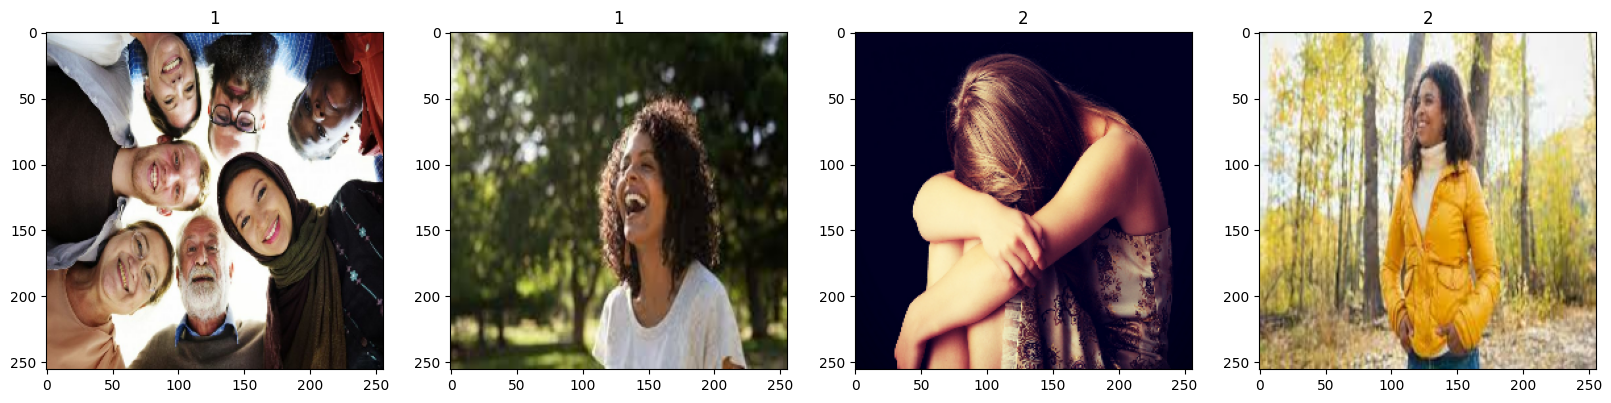

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#2 PreProcessing

**Scaling data**

Why do we need to scale the data ?

1. Typically images have 0-255 px and across 3 channels but in deep learning models it is better to store it as a value between 0-1 as it helps optimize and do a bucnh of other stuff stuff way more easily.

2. Therefore we divide the entire batch by 255 because this way we can leverage the broadcasting aspect of numpy and get all the values of the images stored in the numpy matrix to be between 0-1.

Side note: opencv is bgr and tf is rgb

In [50]:
# batch[0].min() will return 0
# batch[0].max() will return 255

# scaled = batch[0]/255
# print(scaled.min())
# print(scaled.max())

0.0
1.0


THE TRANSFORMATION

a tiny key part of this overall 2nd step, as seen above we need to alter the images to be in 0-1 format and we need to apply this transformation of converting 0-255 to 0-1 which is done below via the .map() function where the lambda function carries out the transformation

In [68]:
data = data.map(lambda x,y : (x/255, y))

In [69]:
scaled_iterator = data.as_numpy_iterator()

In [70]:
batch = scaled_iterator.next()

In [65]:
batch[0].max()

0.003921569

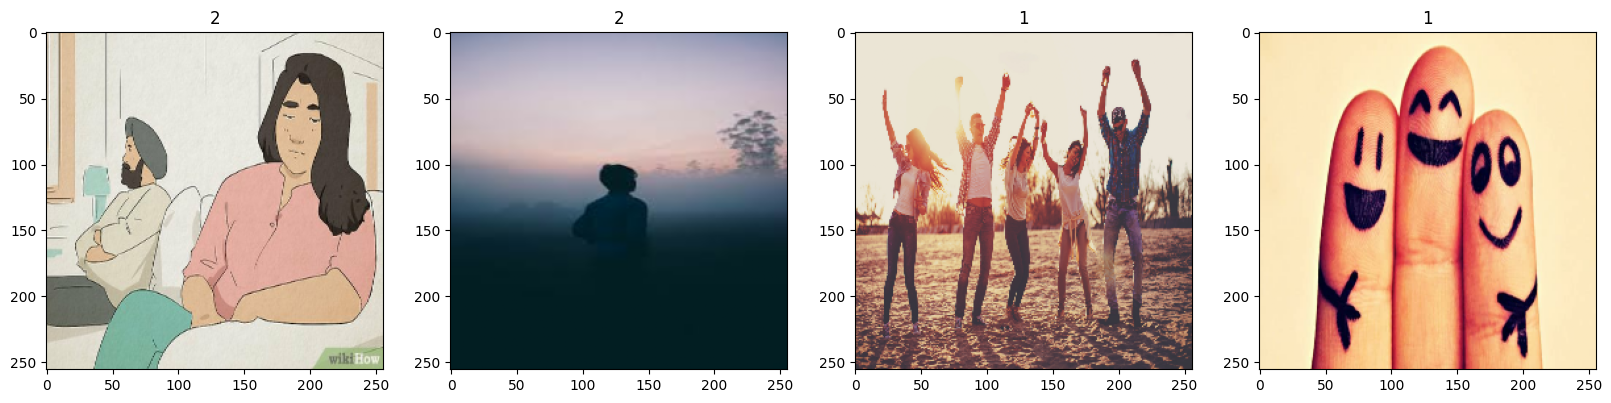

In [71]:
fig, ax = plt.subplots(ncols=4, figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

if in case while running we get the images to be all black or all white it basically means that we may have made a mistake in the data pipeline.

So we re establish the data pipeline by going and running the data.tf.keras.util.... and then we directly run the data.map() transformation and use the scaled_iterator part.

Most likely we may have divided by 255 twice so the numpy values are now bw 0-1 and we were processing the images astype(int) which we omit in the above case therefore it is all normalised

**Split Data**

In [72]:
len(data)
# basically wkt that we have 158 images and our batch size is 32 os 158/32 ~ 5 sets

5

In [77]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [78]:
train_size # so 3 sets ; 3*32 imgs are used to train the algo

3

In [79]:
val_size # so 1 set ; 1*32 imgs are used for validation during training

1

In [80]:
test_size

1

data allocation without overlap

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train), len(val), len(test))

3 1 1


#3 Building the DL Model

**Building using the Keras Sequential API**

Note that tf actually has two types of models



1.   **Sequential** API is used when we have a set data stream with 1 input and 1 output
2.   **Functional** API is the other one which is used when there is a lot of I/O streams and we need to do more fancy stuff

Bear in Mind:

Whenver we create a project like this it is good to frame an architecture as to what all it will have, namely

1. Models: these form the overall math behind the algo and as far as i've learnt it is Sequential or Functional

2. Layers: these are the ones that are used to fine tune the model like Conv2D which basically applies the CNN and then MaxPooling which returns the densest part of the output layer - all of which help in optimizing the model - remeber weights and biases
These are the 'Hidden Layers' that are doing the work

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [83]:
model = Sequential()

there are two main ways people tell the models which layers to incorporate

1. ModelName[layerName1, LayerName2 .....]
2. ModelName.add(Layer1Name + parameters)
   and so on for every layer

It's a matter of personal preference

In [84]:
# addding a convolutional layer and a max pooling layer
# plus this is the first layer - so it also needs to have and input
# convo has 16 filters and a 3,3 filter size with a (stride of 1 - meaning it moves by 1px at a time)
# changing the hyperparameters vastly affects how our model behaves
# the convo essentially takes the image, goes through it and drafts the output to be as dense as possible
# the activation function here is relu which basically reduces below 0 values to 0 and the +ve values remain unchaged
# the maxpooling layer takes the maximum output value from the Conv layer after relu is applied
# and returns the highest value in it
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# when we run through all these filters we get a very huge thing so we need to flatten it so that we have only 1 layer
# which can further be passed through some functions to give the final output
model.add(Flatten())

# here again we can see that the relu will reduce whatever output to 256 and finally sigmoid will reduce it to a 0/1
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam is an optimizer
loss is in this we are determining whether it will be a 0 or 1 so binary
metrics we need accuracy

ps lot of exploring to do here as this is all just spoonfed rn.
Need to look into both the math behind these functions, optimizers etc as well as look into the other varieties out there

In [86]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

*this command helps us understand how the NN and filters are altering ourr input data via looking at the output shape*

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Training**

In [88]:
#creating a log directory
logdir ='logs'

In [89]:
# stores all the tf data into log
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [90]:
# fitting the model on our data and specifying training params
hist = model.fit(train, epochs =20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 798ms/step - loss: -1.3029 - accuracy: 0.4062 - val_loss: -11.5277 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 3s 859ms/step - loss: -18.8644 - accuracy: 0.5000 - val_loss: -32.4942 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: -62.7943 - accuracy: 0.5417 - val_loss: -128.6524 - val_accuracy: 0.5312
Epoch 4/20
3/3 [==============================] - 3s 733ms/step - loss: -185.0529 - accuracy: 0.5208 - val_loss: -244.7677 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 3s 764ms/step - loss: -443.9218 - accuracy: 0.5208 - val_loss: -704.7093 - val_accuracy: 0.4062
Epoch 6/20
3/3 [==============================] - 3s 767ms/step - loss: -1006.5344 - accuracy: 0.4896 - val_loss: -1653.9360 - val_accuracy: 0.4688
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: -1908.8701 - accuracy: 0.5104 - val_loss: -2813.1897 - val_ac

In [91]:
hist.history # gives important details

{'loss': [-1.3029019832611084,
  -18.864355087280273,
  -62.79429244995117,
  -185.0529022216797,
  -443.9217529296875,
  -1006.5343627929688,
  -1908.8701171875,
  -3376.47265625,
  -6994.42822265625,
  -14482.9140625,
  -25032.6015625,
  -40050.55859375,
  -75206.015625,
  -108135.75,
  -165863.796875,
  -265527.53125,
  -435841.90625,
  -602669.875,
  -966239.3125,
  -1477561.875],
 'accuracy': [0.40625,
  0.5,
  0.5416666865348816,
  0.5208333134651184,
  0.5208333134651184,
  0.4895833432674408,
  0.5104166865348816,
  0.53125,
  0.5,
  0.46875,
  0.46875,
  0.5104166865348816,
  0.4479166567325592,
  0.53125,
  0.53125,
  0.5,
  0.4583333432674408,
  0.5,
  0.4583333432674408,
  0.4270833432674408],
 'val_loss': [-11.527671813964844,
  -32.494163513183594,
  -128.65243530273438,
  -244.7677001953125,
  -704.7092895507812,
  -1653.93603515625,
  -2813.189697265625,
  -6259.9423828125,
  -9959.626953125,
  -17593.857421875,
  -25339.587890625,
  -61028.68359375,
  -90728.0703125,
 

**Plot Performance**

Unfortunately overall performance is very different from expected...seems to be either insufficient data / overfitting which will have to be rectified by regularisation or we may have to do some training param alterations and look at bias errors

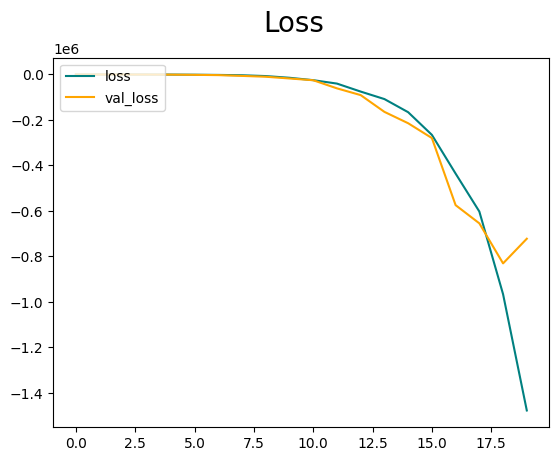

In [93]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color= 'orange', label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

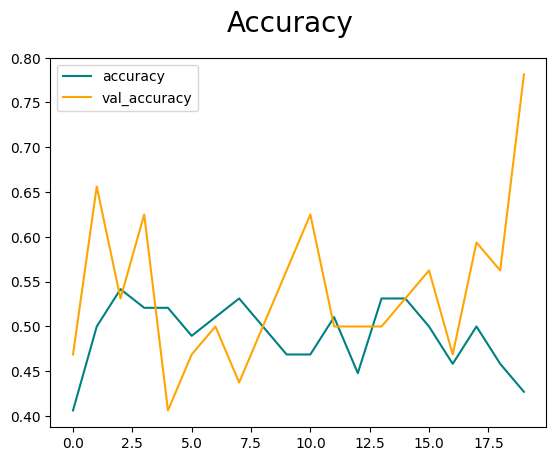

In [94]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color= 'orange', label ='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#4 Evaluating Performance

**Eval**

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [97]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [98]:
len(test)

1

In [99]:
for batch in test.as_numpy_iterator():
  X, y =batch # here X is for images and y is for our true value
  yhat =model.predict(X) # passing image data to the model
  pre.update_state(y, yhat) #
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [100]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:0.5333333611488342


**Testing with External Data**

In [101]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

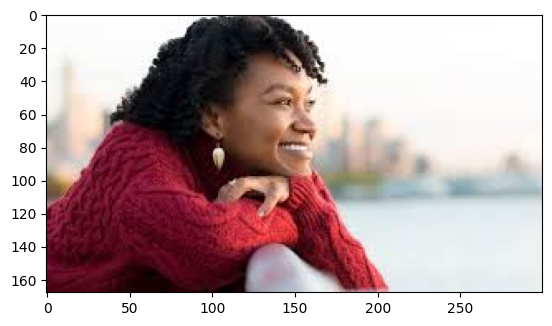

In [122]:
# upload some test data - it isnt in my repo
img = cv2.imread('/content/HappyTest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

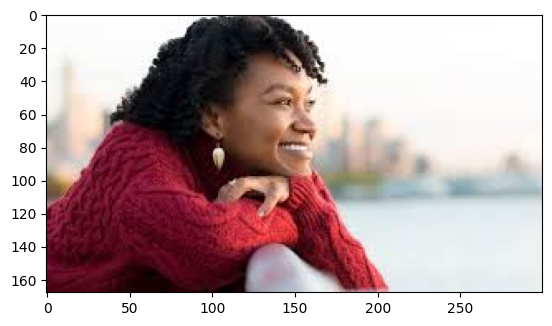

In [123]:
# need to resize it so that it matches the input param of the model layers
resize =tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [124]:
np.expand_dims(resize,0)

array([[[[2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         [2.53000000e+02, 2.53000000e+02, 2.53000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [

In [125]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

array([[1.]], dtype=float32)

In [126]:
if yhat>1.5:
  print("Predicted Class is Sad")
else:
  print("Predicted Class is Happy")

Predicted Class is Happy


#5 Saving Model for Future Deployment

Haven't run this part due to cohesion issues with github

In [127]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('Models', 'HappySadClassF.h5'))

In [ ]:
new_model = load_model(os.path.join('Models', 'HappySadClassF.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

In [ ]:
if yhatnew>1.5:
  print("Predicted Class is Sad")
else:
  print("Predicted Class is Happy")